# Car Price Prediction

## Problem Statement

#### With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make a car price valuation model.

### Importing Libraries

In [644]:
import pandas as pd # for handling dataset
import numpy as np  # for mathematical computation

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew

# for visualization 
import plotly.express as px
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns

# for saving & loading model
import pickle

import warnings
warnings.filterwarnings('ignore')

In [645]:
# After web scrapping was done. 
# The data was further optimized by removing units, creating brand column using flash fill in excel sheet.
# Applying formula to convert price into integers in excel itself. (Ex- 4 lakh* to 400000)

In [646]:
# reading the data
df=pd.read_csv(r'E:\Cars dataset.csv')

In [647]:
df.head() # to display top 5 rows from dataset

,Model,brand,variant,mfg,km_drvn,fuel,mileage,engine,max_pwr,torque,owner,transmission,location,Price
0,Maruti Ciaz,Maruti,ZXi Plus,2015,80000.0,Petrol,20.73,1373,91.10,130.00,First Owner,Manual,Goa,700000
1,Hyundai i20 Active,Hyundai,1.2 SX,2017,120000.0,Petrol,17.19,1197,81.86,114.73,Second Owner,Manual,Goa,535000
2,Mercedes-Benz E-Class,Mercedes,E350 CDI Avantgarde,2010,142000.0,Diesel,11.50,2987,210.00,490.00,First Owner,Automatic,Goa,2400000
3,Hyundai Getz,Hyundai,1.1 GVS (Rear Spoiler),2009,110000.0,Petrol,12.30,1086,66.60,10.40,First Owner,Automatic,Goa,200000
4,Volkswagen Vento,Volkswagen,Diesel Highline,2011,100000.0,Diesel,20.54,1598,103.60,250.00,First Owner,Manual,Goa,385000


### Dataset Description

1- Model name

2- Brand name

3- Variant

4- Manufacturing year

5- Kilometers driven (in kms)

6- Fuel type

7- Mileage (in kmpl)

8- Engine displacement (in cc)

9- Maximum power (in bhp)

10- Torque (in Nm)

11- No of owners

12- Transmission type

13- Location

14- Price (in inr)

In [648]:
print('Total no of rows & columns: ',df.shape) # to check number of rows & columns

Total no of rows & columns:  (5072, 14)


In [649]:
print('List of columns: ',df.columns) # to display all the columns name in the dataset

List of columns:  Index(['Model', 'brand', 'variant', 'mfg', 'km_drvn', 'fuel', 'mileage',
       'engine', 'max_pwr', 'torque', 'owner', 'transmission', 'location',
       'Price'],
      dtype='object')


In [650]:
df.info() # to know datatype of each columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5072 entries, 0 to 5071
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Model         5072 non-null   object 
 1   brand         5072 non-null   object 
 2   variant       5072 non-null   object 
 3   mfg           5072 non-null   int64  
 4   km_drvn       5065 non-null   float64
 5   fuel          5072 non-null   object 
 6   mileage       5072 non-null   float64
 7   engine        5072 non-null   int64  
 8   max_pwr       5071 non-null   float64
 9   torque        5062 non-null   float64
 10  owner         5072 non-null   object 
 11  transmission  5072 non-null   object 
 12  location      5072 non-null   object 
 13  Price         5072 non-null   int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 554.9+ KB


In [651]:
# to count number of unique values in each columns 
df.nunique()

Model            606
brand             29
variant         1397
mfg               23
km_drvn         2413
fuel               5
mileage          385
engine           125
max_pwr          325
torque           232
owner              9
transmission      20
location          13
Price           1509
dtype: int64

In [652]:
# to list categorical features in our dataset
cat_features=[i for i in df.columns if df.dtypes[i]=='object']
cat_features

['Model', 'brand', 'variant', 'fuel', 'owner', 'transmission', 'location']

In [653]:
# to list continous features in our dataset
con_features=[i for i in df.columns if df.dtypes[i]=='int64' or df.dtypes[i]=='float64']
con_features

['mfg', 'km_drvn', 'mileage', 'engine', 'max_pwr', 'torque', 'Price']

In [654]:
df.describe().T # to get high understanding of dataset or to get overview/stats of the dataset

,count,mean,std,min,25%,50%,75%,max
mfg,5072.0,2015.049093,3.182132,1989.0,2013.00,2016.00,2017.00,2021.00
km_drvn,5065.0,54321.217572,39144.378292,1001.0,29867.00,49000.00,72000.00,1019000.00
mileage,5072.0,19.853760,4.055172,0.0,17.21,20.14,22.54,33.54
engine,5072.0,1424.110410,462.910685,72.0,1197.00,1248.00,1498.00,5461.00
max_pwr,5071.0,97.742749,41.697566,0.0,74.00,85.80,108.45,575.00
torque,5062.0,173.988123,104.090620,0.0,110.00,145.00,204.00,850.00
Price,5072.0,729037.054811,820864.945625,40000.0,371000.00,525000.00,725000.00,11700000.00


1. Count is not same.

2. Mileage, Maximum power and Torque minimum value cannot be zero.

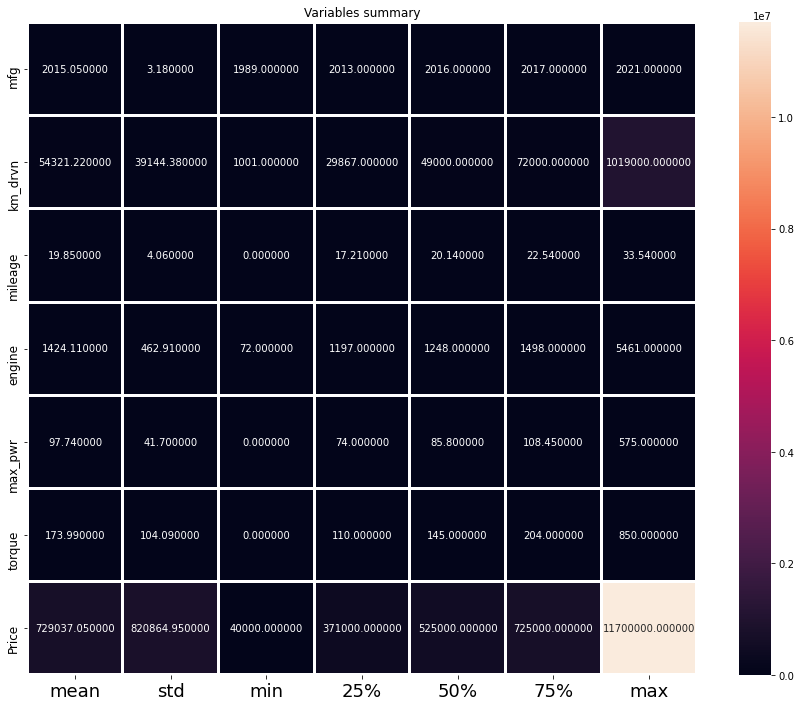

In [655]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

#### From the above plotting we are determining mean, standard deviation, minimum and maximum values of above columns. It helps us further in data cleaning.

In [656]:
df.isnull().sum()  # to check null values

Model            0
brand            0
variant          0
mfg              0
km_drvn          7
fuel             0
mileage          0
engine           0
max_pwr          1
torque          10
owner            0
transmission     0
location         0
Price            0
dtype: int64

#### Null values present in the dataset

In [657]:
# treating null values 
df['km_drvn']=df['km_drvn'].fillna(df['km_drvn'].median())
df['max_pwr']=df['max_pwr'].fillna(df['max_pwr'].median())
df['torque']=df['torque'].fillna(df['torque'].median())

In [658]:
df.isnull().sum()  # to check null values

Model           0
brand           0
variant         0
mfg             0
km_drvn         0
fuel            0
mileage         0
engine          0
max_pwr         0
torque          0
owner           0
transmission    0
location        0
Price           0
dtype: int64

#### No null values 

In [659]:
# to count sum of 0's present 
print('Total no of zeros in mileage is:',sum(df['mileage']==0))
print('Total no of zeros in max_pwr is:',sum(df['max_pwr']==0))
print('Total no of zeros in torque is:',sum(df['torque']==0))

Total no of zeros in mileage is: 19
Total no of zeros in max_pwr is: 21
Total no of zeros in torque is: 1


In [660]:
# filling zero with median value
df['mileage']=df['mileage'].replace(0,df['mileage'].median())
df['max_pwr']=df['max_pwr'].replace(0,df['max_pwr'].median())
df['torque']=df['torque'].replace(0,df['torque'].median())

In [661]:
# to find unique elements 
df['transmission'].unique()

array(['Manual', 'Automatic', 'RTO\nDL6C', 'RTO\nDL3C', 'RTO\nUP14',
       'RTO\nDL5C', 'RTO\nDL9C', 'RTO\nDL7C', 'RTO\nDL12', 'RTO\nDL2C',
       'RTO\nDL4C', 'RTO\nHR87', 'RTO\nDL1C', 'RTO\nHR29', 'RTO\nHR26',
       'RTO\nDL10', 'RTO\nHR51', 'RTO\nUP16', 'RTO\nDL8C', 'RTO\nHR77'],
      dtype=object)

In [662]:
# Appending different values in the column into one value having maximum counts 
df['transmission']=df['transmission'].replace(['RTO\nDL9C','RTO\nHR87','RTO\nDL3C','RTO\nHR26',
                                              'RTO\nDL6C','RTO\nDL10','RTO\nDL4C','RTO\nUP16','RTO\nHR29',
                                               'RTO\nUP14','RTO\nDL8C','RTO\nDL7C','RTO\nDL1C','RTO\nHR77','RTO\nDL5C',
                                               'RTO\nHR51','RTO\nDL2C','RTO\nDL12'],'Manual',regex=True)

In [663]:
# to check the column
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [664]:
# to find unique elements 
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car', '1st Owner', '2nd Owner',
       '3rd Owner', '4th Owner'], dtype=object)

In [665]:
# Appending duplicate values into one
df['owner']=df['owner'].replace('First Owner','1st Owner',regex=True)
df['owner']=df['owner'].replace('Second Owner','2nd Owner',regex=True)
df['owner']=df['owner'].replace('Third Owner','3rd Owner',regex=True)
df['owner']=df['owner'].replace('Fourth & Above Owner','4th Owner',regex=True)

# Appending different values in the column into one value having maximum counts
df['owner']=df['owner'].replace('Test Drive Car','1st Owner',regex=True)

In [666]:
# to check the column
df['owner'].unique()

array(['1st Owner', '2nd Owner', '3rd Owner', '4th Owner'], dtype=object)

In [667]:
# to find unique elements 
df['brand'].unique()

array(['Maruti', 'Hyundai', 'Mercedes', 'Volkswagen', 'Tata', 'Ford',
       'Chevrolet', 'Renault', 'Mitsubishi', 'Nissan', 'Skoda', 'BMW',
       'Mahindra', 'Audi', 'Honda', 'Toyota', 'Datsun', 'Volvo',
       'Land Rover', 'Jaguar', 'Porsche', 'MG', 'Jeep', 'Kia', 'Fiat',
       'Ambassador', 'Opel', 'Lexus', 'Mini'], dtype=object)

## Univariate Analysis

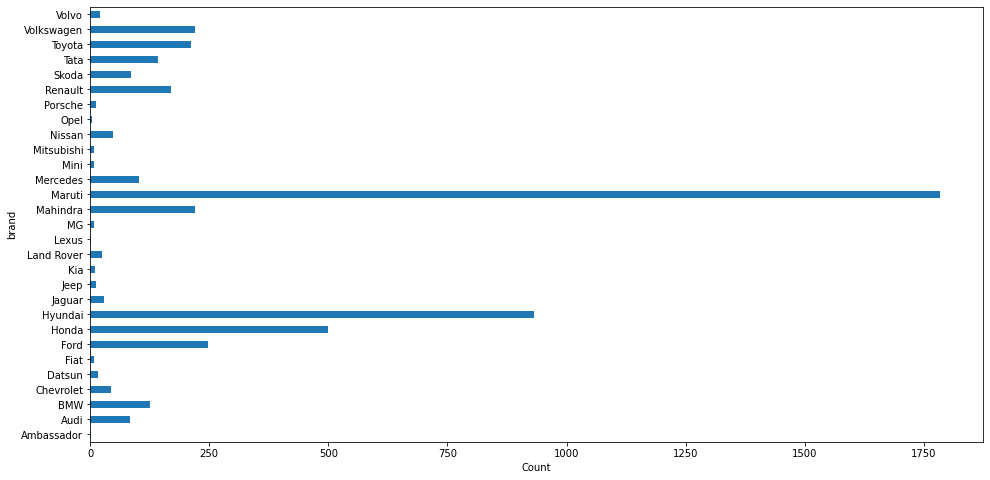

In [668]:
# to visualize brand column
plt.subplots(figsize=(16,8))
df.groupby('brand')['brand'].count().plot(kind='barh')
plt.xlabel('Count')
plt.show()

#### Maruti brand type of used cars is present in maximum number than any other. 

Text(0.5, 0, 'Type of Fuel')

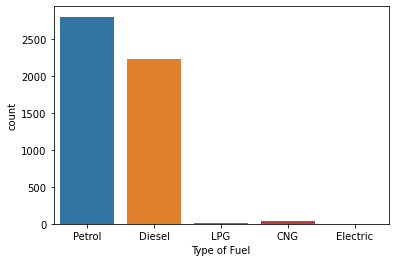

In [669]:
# to visualize the fuel column 
sns.countplot(x='fuel',data=df)
plt.xlabel('Type of Fuel')

#### Mostly used cars in the data is having petrol type of fuel then followed by diesel.

<AxesSubplot:xlabel='owner', ylabel='count'>

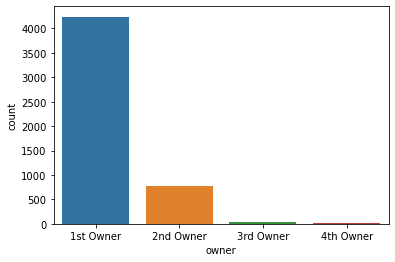

In [670]:
# to visualize owner column
sns.countplot(x='owner',data=df)

#### Above plot shows that used cars have maximum only one owner.   

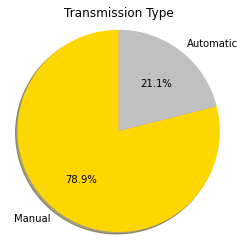

In [671]:
# to visualize column 'transmission' in pie chart

labels = ['Manual', 'Automatic']

fig, ax = plt.subplots(figsize=(4,4))
colors = ['gold', 'silver']
ax.pie(df['transmission'].value_counts(),  labels=labels, autopct='%1.1f%%',shadow=True, startangle=90, colors=colors)
ax.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Transmission Type')
plt.show()

#### Around 79% of used cars are of Manual type and rest 21% are of Automatic type.

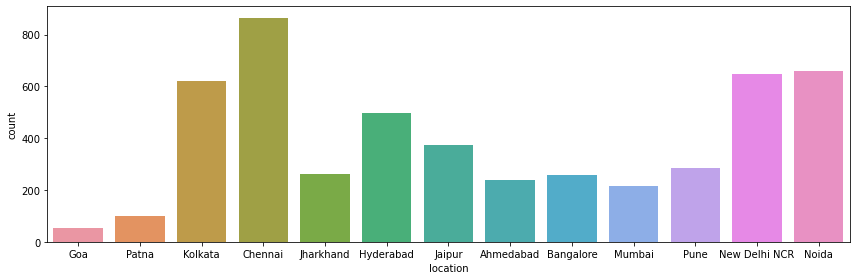

In [672]:
# to visualize location column
plt.figure(figsize=(12,4))
sns.countplot(df['location'])  
plt.tight_layout()

#### Maximum used cars data have been scraped from chennai location.

<AxesSubplot:xlabel='mfg', ylabel='count'>

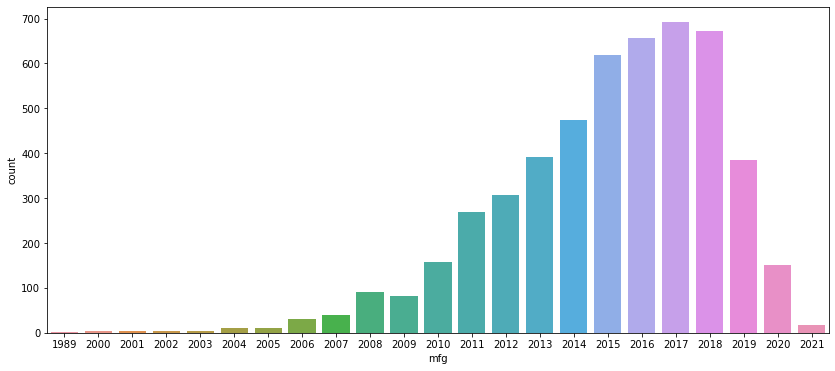

In [673]:
# to visualize make year column
plt.subplots(figsize=(14,6))
sns.countplot(x='mfg',data=df)

#### Mostly the used cars make year lies between 2015-2018.

## Bivariate Analysis

Text(0, 0.5, 'Mileage in kmpl')

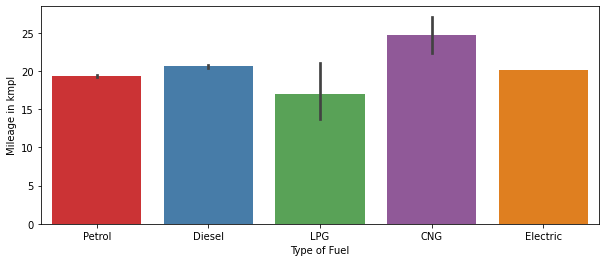

In [674]:
# to visualize Mileage vs Fuel
plt.subplots(figsize=(10,4))
sns.barplot(x='fuel',y='mileage', data=df,palette='Set1')
plt.xlabel('Type of Fuel')
plt.ylabel('Mileage in kmpl')

#### CNG fuel gives more mileage than other fuels.

Text(0, 0.5, 'Max Power in bhp')

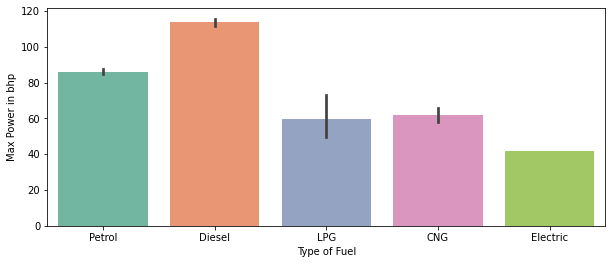

In [675]:
# to visualize Maximum Power vs Fuel
plt.subplots(figsize=(10,4))
sns.barplot(x='fuel',y='max_pwr', data=df,palette='Set2')
plt.xlabel('Type of Fuel')
plt.ylabel('Max Power in bhp')

#### Diesel fuel gives maximum power to vehicles than any other fuels.

Text(0, 0.5, 'Torque in Nm')

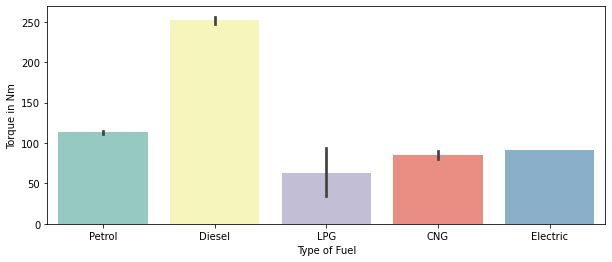

In [676]:
# to visualize Torque vs Fuel
plt.subplots(figsize=(10,4))
sns.barplot(x='fuel',y='torque', data=df,palette='Set3')
plt.xlabel('Type of Fuel')
plt.ylabel('Torque in Nm')

#### Diesel fuel provides maximum torque to vehicles than any other fuels.

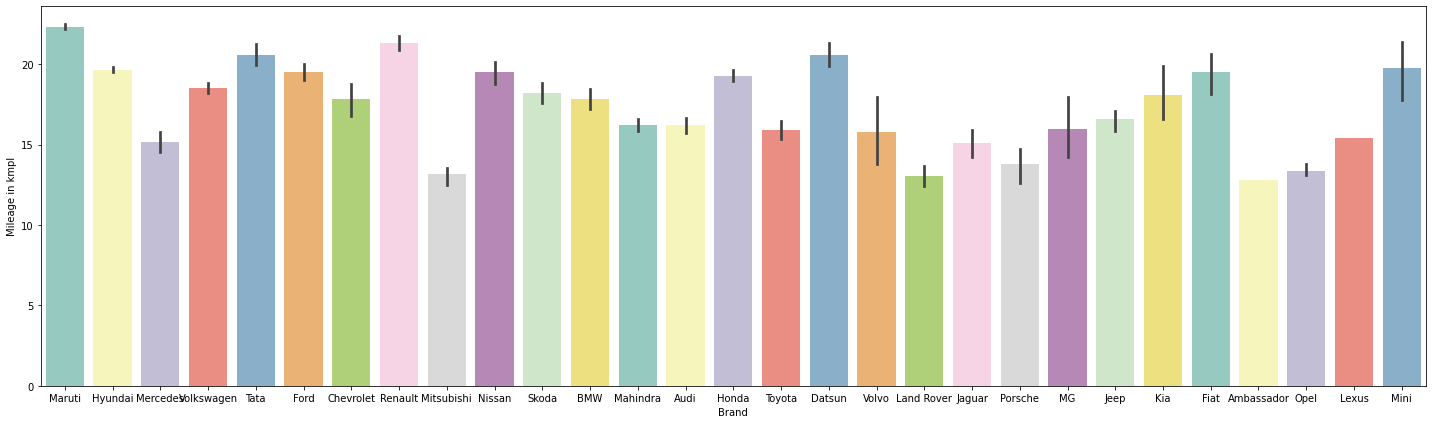

In [677]:
# to visualize Mileage vs Brand
plt.subplots(figsize=(20,6))
sns.barplot(x='brand',y='mileage', data=df,palette='Set3')
plt.xlabel('Brand')
plt.ylabel('Mileage in kmpl')
plt.tight_layout()

#### Used Cars of Maruti brand gives above 20kmpl mileage.
#### Rest Tata, Renault, Hyundai, Datsun, Ford, Honda, Nissan, Fiat, Mini type of used cars gives mileage between (17-20)kmpl.

Text(0, 0.5, 'Kilometers driven')

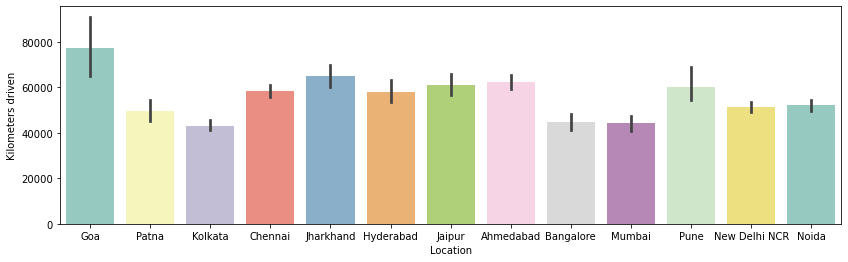

In [678]:
# to visualize Kilometers driven vs Location
plt.subplots(figsize=(14,4))
sns.barplot(x='location',y='km_drvn', data=df,palette='Set3')
plt.xlabel('Location')
plt.ylabel('Kilometers driven')

#### Maximum kilometers driven used cars is from Goa location.

## Variable vs Target Variable (Price)

Text(0.5, 0, 'Location')

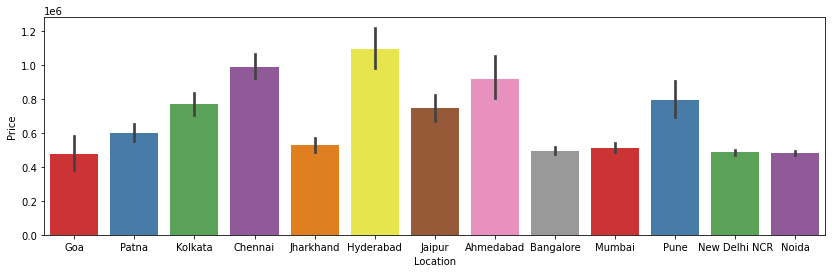

In [679]:
plt.subplots(figsize=(14,4))
sns.barplot(x='location',y='Price', data=df,palette='Set1')
plt.xlabel('Location')

#### Price of used cars is maximum in Hyderabad and least in Goa.

Text(0.5, 0, 'Type of Fuel')

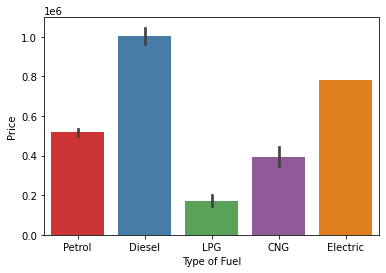

In [680]:
sns.barplot(x='fuel',y='Price', data=df,palette='Set1')
plt.xlabel('Type of Fuel')

#### Diesel used cars price is high than others. 

Text(0.5, 0, 'Type of Fuel')

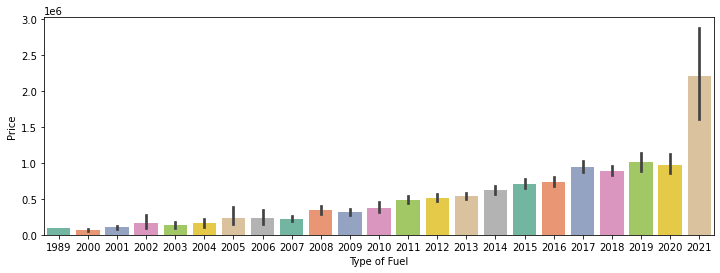

In [681]:
plt.figure(figsize=(12,4))
sns.barplot(x='mfg',y='Price', data=df,palette='Set2')
plt.xlabel('Type of Fuel')

#### Older manufacturing date used cars price decreases, whereas used cars with newer manufacturing date price increases.

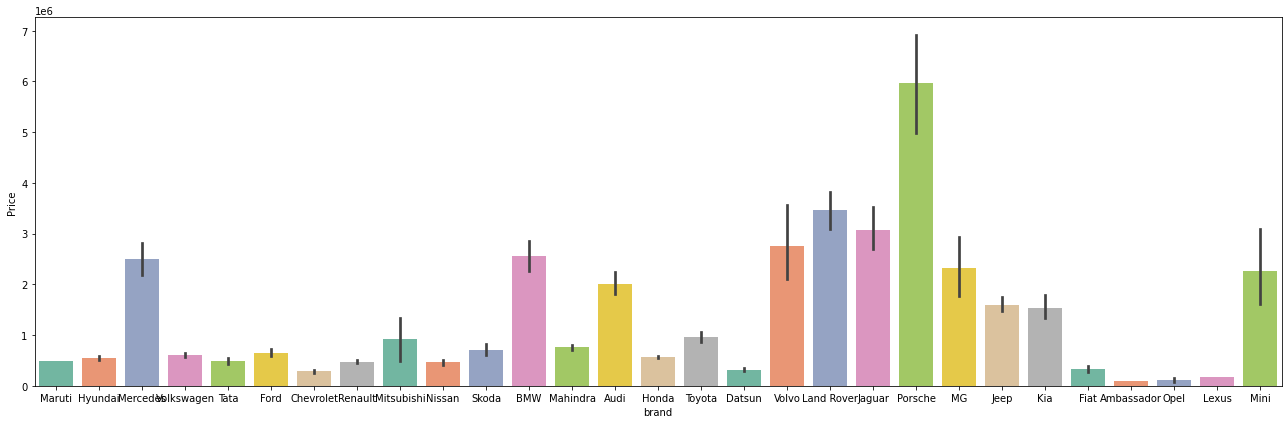

In [682]:
plt.figure(figsize=(18,6))
sns.barplot(x='brand',y='Price', data=df,palette='Set2')
plt.tight_layout()

#### Used cars of Porsche brand has maximum price than other brand of cars.

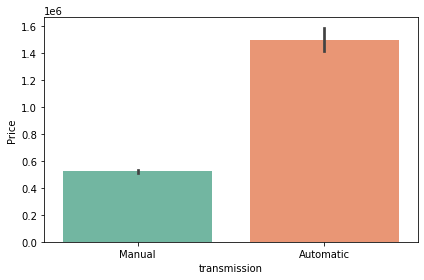

In [683]:
sns.barplot(x='transmission',y='Price', data=df,palette='Set2')
plt.tight_layout()

#### Automatic type of used cars price is very much high than manual ones.

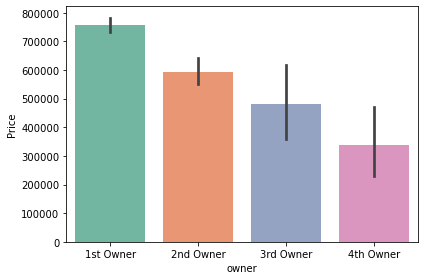

In [684]:
sns.barplot(x='owner',y='Price', data=df,palette='Set2')
plt.tight_layout()

#### More the number of owners of car, lesser will be its price.

In [685]:
# converting objects into integers
lab_enc = LabelEncoder()
list1 = ['Model', 'brand', 'variant', 'fuel','owner', 'transmission', 'location']
for val in list1:
    df[val] = lab_enc.fit_transform(df[val].astype(str))

In [686]:
df.head()

,Model,brand,variant,mfg,km_drvn,fuel,mileage,engine,max_pwr,torque,owner,transmission,location,Price
0,314,16,1332,2015,80000.0,4,20.73,1373,91.10,130.00,0,1,3,700000
1,202,8,104,2017,120000.0,4,17.19,1197,81.86,114.73,1,1,3,535000
2,415,17,762,2010,142000.0,1,11.50,2987,210.00,490.00,0,0,3,2400000
3,144,8,44,2009,110000.0,4,12.30,1086,66.60,10.40,0,0,3,200000
4,584,27,720,2011,100000.0,1,20.54,1598,103.60,250.00,0,1,3,385000


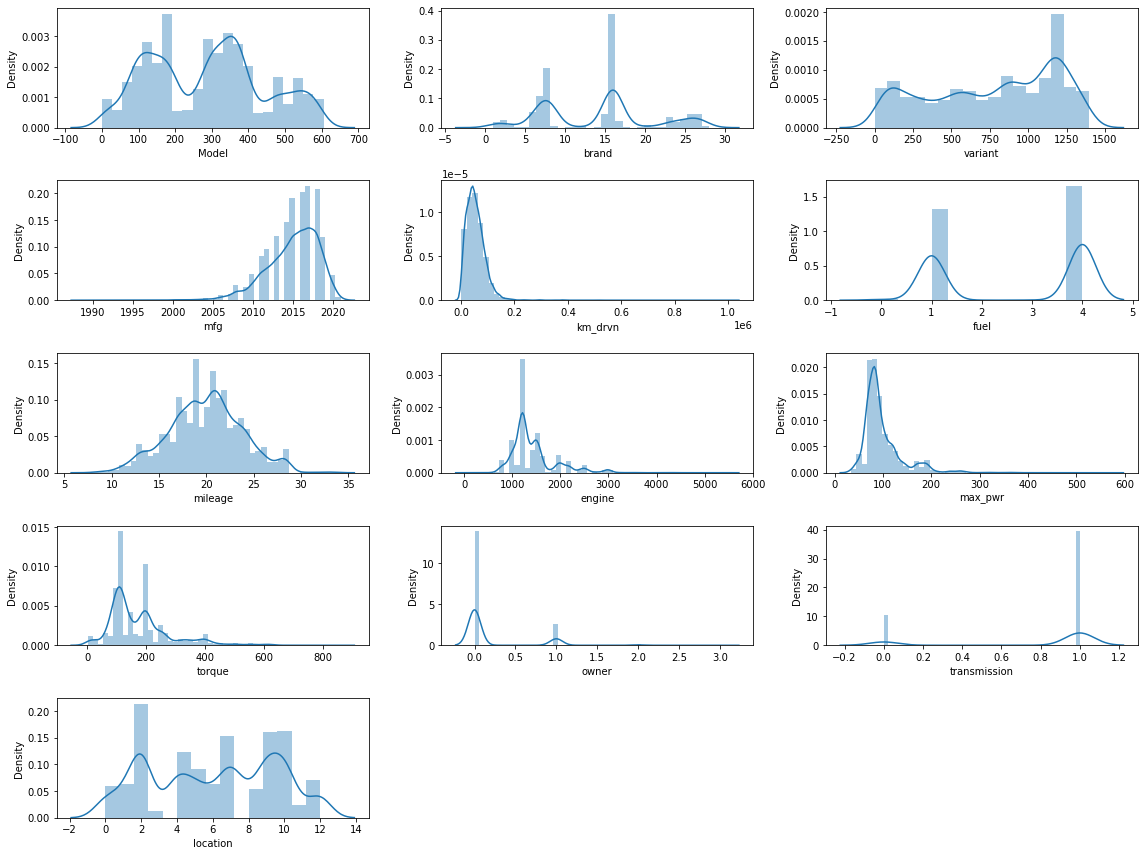

In [687]:
# to visualize columns
plt.figure(figsize=(16,12), facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=13:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

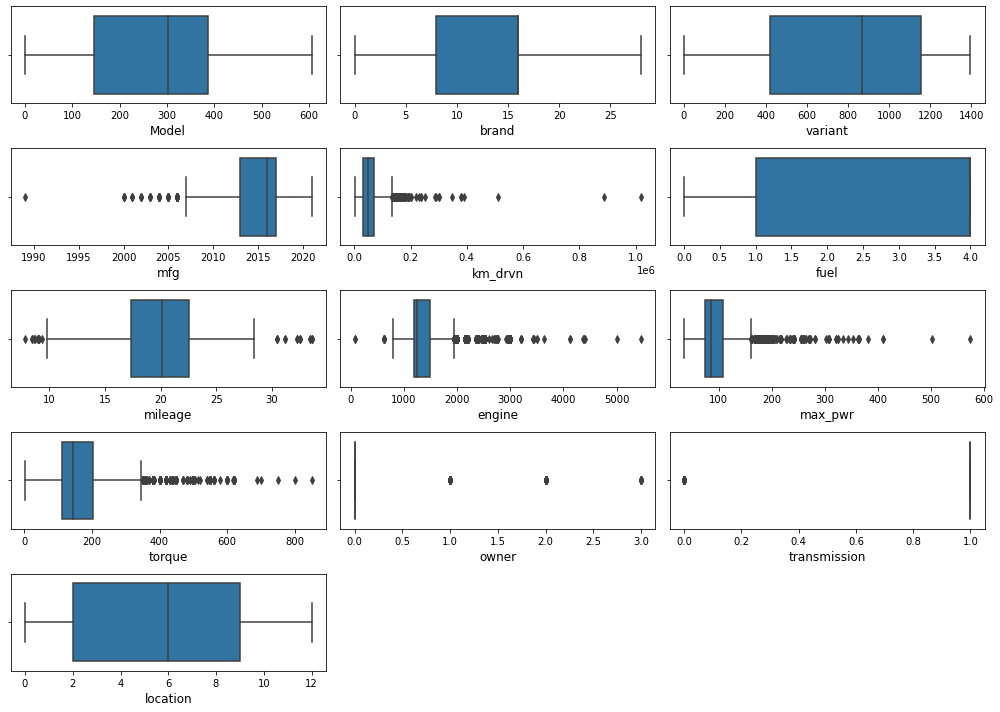

In [688]:
# Lets visualize the columns in boxplot to check outliers
plt.figure(figsize=(14,10))
plot=1
for col in df:
    if plot<=13:
        plt.subplot(5,3,plot)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=12)
        plot=plot+1
plt.tight_layout()

In [689]:
# Using 1.5 IQR method to remove outliers

def outlier(df,col):
    lower_boundary=df[col].mean()-1.5*df[col].std()
    upper_boundary=df[col].mean()+1.5*df[col].std()
    print(lower_boundary,upper_boundary)
    df.loc[df[col]> upper_boundary,col] = upper_boundary
    df.loc[df[col]<lower_boundary,col]=lower_boundary

In [690]:
outlier(df,'mfg')
outlier(df,'km_drvn')
outlier(df,'mileage')
outlier(df,'engine')
outlier(df,'max_pwr')
outlier(df,'torque')

2010.275894499767 2019.8222916201069
-4362.902065536444 112990.64930528408
14.127064258143925 25.731346625136034
729.7443828271835 2118.476437362091
36.26224623310519 159.92903136941345
18.007571239819526 329.9115454794227


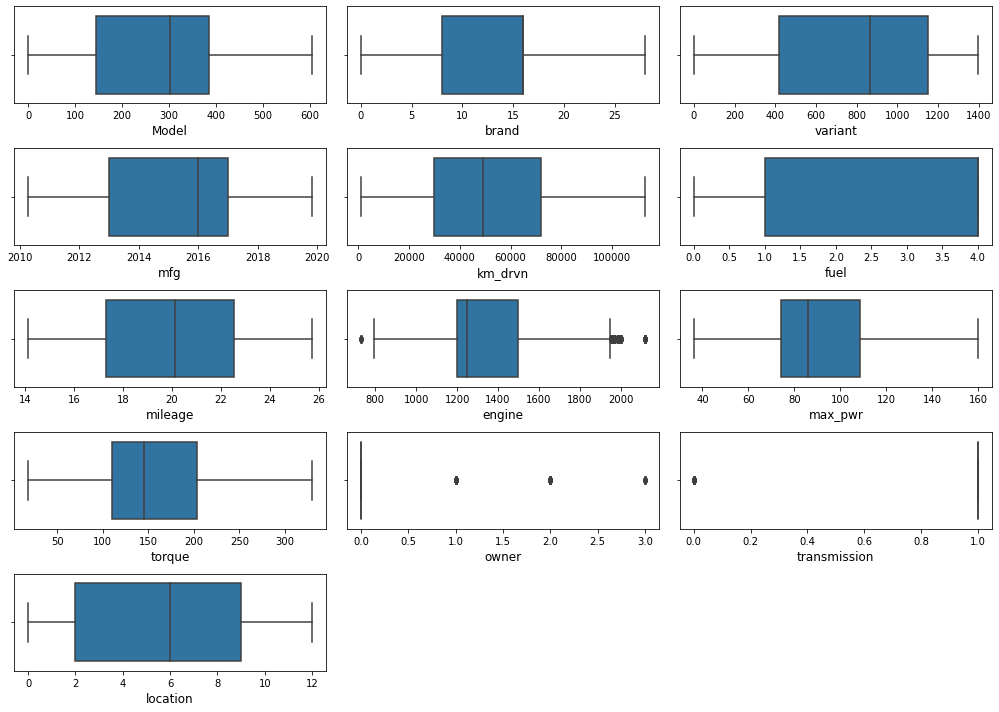

In [691]:
# again visualizing through boxplot after removing outliers
plt.figure(figsize=(14,10))
plot=1
for col in df:
    if plot<=13:
        plt.subplot(5,3,plot)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=12)
        plot=plot+1
plt.tight_layout()

### No Considerable amount of outliers present now.

In [692]:
# to see skewness for every column
df.skew()

Model           0.174859
brand           0.256360
variant        -0.335449
mfg            -0.305516
km_drvn         0.391442
fuel           -0.222638
mileage        -0.024340
engine          0.783026
max_pwr         0.929247
torque          0.632064
owner           2.496712
transmission   -1.418753
location       -0.062872
Price           4.838895
dtype: float64

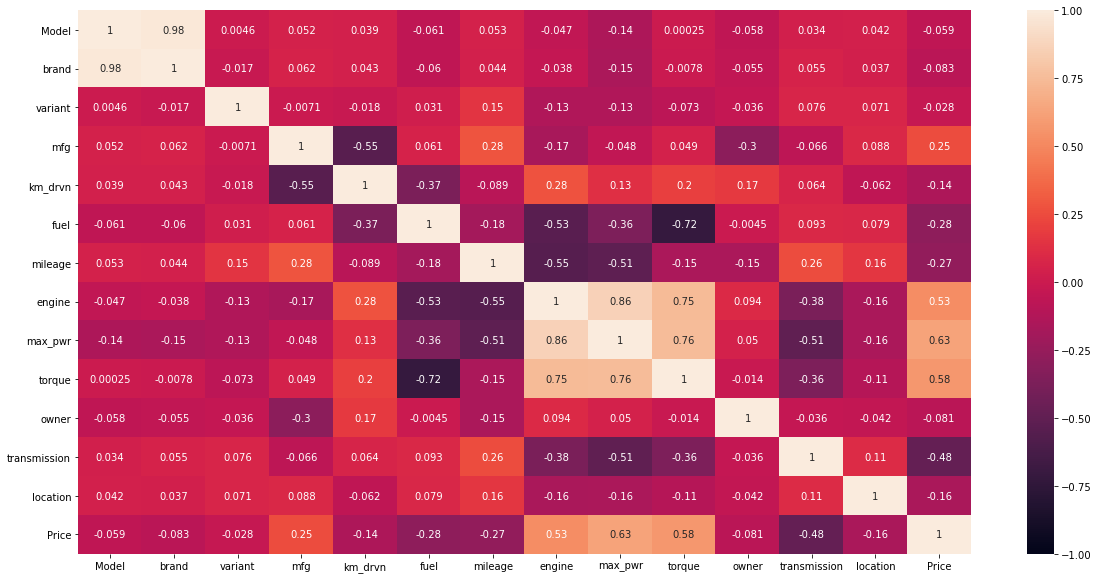

In [693]:
# plotting heatmap to observe the correlation
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, vmin=-1.0, vmax=1.0)
plt.show()

#### Engine, Maximum Power and Torque has good positive correlation with (Price) target variable.

In [694]:
y = df['Price']
X = df.drop('Price', axis = 1)

In [695]:
# Data Scaling.  Formula Z=(x-mean)/std
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [696]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled, i) for i in range (X_scaled.shape[1])]
vif["features"] = X.columns

#let's check the values
vif

,vif,features
0,29.220428,Model
1,29.667560,brand
2,1.047638,variant
3,1.779913,mfg
4,1.726609,km_drvn
5,4.246681,fuel
6,2.871381,mileage
7,7.949152,engine
8,7.233796,max_pwr
9,5.376691,torque


#### Multicollinearity problem exists

In [697]:
# dropping column to remove multicollinearity
df=df.drop(columns='brand')

In [698]:
# Split data into train and test. Model will be built on training data and tested on test data
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25, random_state = 51)

In [699]:
y_train.head()

2095    7500000
68      1075000
2984     445500
1241     740000
3959     375000
Name: Price, dtype: int64

## Linear Regression

In [700]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [701]:
# Adjusted R2 score
regression.score(x_train,y_train)

0.5665753405656866

In [702]:
# To cross verify
y_pred = regression.predict(x_test)

In [703]:
r2_score(y_test,y_pred)

0.5215885761531771

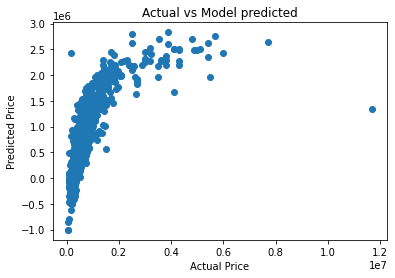

In [704]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Model predicted')
plt.show()

In [705]:
mean_absolute_error(y_test,y_pred)

291520.1204265638

In [706]:
mean_squared_error(y_test,y_pred)

300815153769.9332

In [707]:
np.sqrt(mean_squared_error(y_test,y_pred))

548466.1828863592

In [708]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(regression,X_scaled,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[ 0.56481521  0.52061566  0.56118793 -0.35464658  0.3863612 ]
0.3356666824329548
0.35119149834518265


## Using Regularization method to check whether our regression model is overfitting or not

In [709]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

### Lasso Regularization

In [710]:
# LassoCV will return best alpha after max iteration
# Normalize is subtracting the mean and dividingby the l2-norm
lasscv = LassoCV(alphas = None, max_iter = 1000, normalize = True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [711]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

8.515055871093432

In [712]:
# now that we have best parameter, lets use Lasso regression and see how well our data has fitted before
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=8.515055871093432)

In [713]:
lasso_reg.score(x_test,y_test)

0.521594106510904

### Using Ridge regression model

In [714]:
# RidgeCV will return best alpha and coefficients after performing 10 cross validations.
ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize = True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [715]:
ridgecv.alpha_

0.001

In [716]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [717]:
ridge_model.score(x_test,y_test)

0.5215886075560087

#### So we can see by using different type of regularization,we still are getting almost same r2 score. That means our linear regression model has been well trained over the training data and there is no overfitting.

## Decision Tree Regressor

In [718]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)

print("\n===================Train Result======================")

print(f"Accuracy Score: {dt_reg.score(x_train,y_train) * 100:.2f}%")
print("______________________________________________")

#*********************** Test Score *************************

y_pred = dt_reg.predict(x_test)
print("\n===================Test Result======================")
print(f"Accuracy Score: {dt_reg.score(x_test,y_test) * 100:.2f}%")
print("______________________________________________")


===================Train Result======================
Accuracy Score: 100.00%
______________________________________________

===================Test Result======================
Accuracy Score: 62.23%
______________________________________________


In [719]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(dt_reg,X_scaled,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.37505938 0.49207006 0.60816303 0.69212352 0.32052034]
0.49758726592324204
0.13890109639615816


### Random Forest Regressor

In [720]:
rand_reg = RandomForestRegressor(n_estimators = 100,random_state=51)
rand_reg.fit(x_train,y_train)

print("\n===================Train Result======================")

print(f"Accuracy Score: {rand_reg.score(x_train,y_train) * 100:.2f}%")
print("______________________________________________")

#*********************** Test Score *************************

y_pred = rand_reg.predict(x_test)
print("\n===================Test Result======================")
print(f"Accuracy Score: {rand_reg.score(x_test,y_test) * 100:.2f}%")
print("______________________________________________")


===================Train Result======================
Accuracy Score: 97.55%
______________________________________________

===================Test Result======================
Accuracy Score: 70.74%
______________________________________________


In [721]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(rand_reg,X_scaled,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.63583286 0.63745619 0.78919336 0.74747251 0.6949589 ]
0.7009827655379215
0.06042983997148962


### KNN Regressor

In [722]:
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train,y_train)

print("\n===================Train Result======================")

print(f"Accuracy Score: {knn.score(x_train,y_train) * 100:.2f}%")
print("______________________________________________")

#*********************** Test Score *************************

y_pred = knn.predict(x_test)
print("\n===================Test Result======================")
print(f"Accuracy Score: {knn.score(x_test,y_test) * 100:.2f}%")
print("______________________________________________")


===================Train Result======================
Accuracy Score: 91.23%
______________________________________________

===================Test Result======================
Accuracy Score: 60.11%
______________________________________________


In [723]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(knn,X_scaled,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.58414067 0.57920471 0.69069629 0.70739684 0.63845231]
0.6399781645985435
0.05278479365430768


### Gradient Boosting Regressor

In [724]:
from sklearn.ensemble import GradientBoostingRegressor
np.random.seed(42)
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

print("\n===================Train Result======================")

print(f"Accuracy Score: {gbr.score(x_train,y_train) * 100:.2f}%")
print("______________________________________________")

#*********************** Test Score *************************

y_pred = gbr.predict(x_test)
print("\n===================Test Result======================")
print(f"Accuracy Score: {gbr.score(x_test,y_test) * 100:.2f}%")
print("______________________________________________")


===================Train Result======================
Accuracy Score: 89.88%
______________________________________________

===================Test Result======================
Accuracy Score: 71.39%
______________________________________________


In [725]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(gbr,X_scaled,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.7696842  0.63174897 0.82030447 0.75572793 0.6855019 ]
0.7325934955112322
0.0663194899815676


### XGBRegressor

In [726]:
from xgboost.sklearn import XGBRegressor
np.random.seed(42)
xgb = XGBRegressor()
xgb.fit(x_train, y_train)

print("\n===================Train Result======================")

print(f"Accuracy Score: {xgb.score(x_train,y_train) * 100:.2f}%")
print("______________________________________________")

#*********************** Test Score *************************

y_pred = xgb.predict(x_test)
print("\n===================Test Result======================")
print(f"Accuracy Score: {xgb.score(x_test,y_test) * 100:.2f}%")
print("______________________________________________")


===================Train Result======================
Accuracy Score: 99.83%
______________________________________________

===================Test Result======================
Accuracy Score: 72.59%
______________________________________________


In [727]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(xgb,X_scaled,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.6433697  0.62009908 0.82790484 0.75837036 0.7902962 ]
0.728008036983996
0.08196224716664977


In [729]:
accuracy =[52.15,62.23,70.74,60.11,71.39,72.59]
cross_val_score=[33.56,49.75,70.09,63.99,73.25,72.80]

model=['Linear Regression','Decision Tree','Random Forest','KNN','Gradient','XGBoost']
best_model=pd.DataFrame({'Model':model,'Accuracy':accuracy,'Cross validation score':cross_val_score})
best_model

,Model,Accuracy,Cross validation score
0,Linear Regression,52.15,33.56
1,Decision Tree,62.23,49.75
2,Random Forest,70.74,70.09
3,KNN,60.11,63.99
4,Gradient,71.39,73.25
5,XGBoost,72.59,72.80


In [731]:
#  XGBRegressor model is our best model because difference between accuracy and CV score is least than other models.

### Using GridSearchCV for hyper parameter tuning on best model (XGBRegressor)

In [732]:
grid_param =  { 'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
              }

In [733]:
grid_search = GridSearchCV(estimator=xgb,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs=-1)

In [734]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=8,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
      

In [735]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 10, 'min_child_weight': 3, 'n_estimators': 500, 'objective': 'reg:squarederror', 'subsample': 0.7}


In [736]:
xgb = XGBRegressor(colsample_bytree =0.5, learning_rate= 0.01, max_depth= 10, min_child_weight= 3, n_estimators= 500, 
                    objective= 'reg:squarederror',subsample= 0.7)
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=10,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [737]:
xgb.score(x_test,y_test)

0.7627804652686457

In [738]:
# After applying hyper parameter tuning accuracy increased by 3.68%.

## Model Saving

In [739]:
# saving the model to local system
filename = 'Car Price Prediction_model.pickle'
pickle.dump(xgb,open(filename,'wb'))

In [740]:
# Model has been saved successfully. Let's check by predicting with the loaded model.

## Loading and predicting with the loaded model

In [741]:
# loading the saved model
loaded_model = pickle.load(open(filename,'rb'))

In [742]:
# predicting with the loaded model
predictions = loaded_model.predict(x_test)